## Descriptive graphs

In [3]:
from plotnine import *
import pandas as pd

In [129]:
NGRAMS_df = pd.read_csv('..\data\perception_data.csv')

Graph: London a rainy city: a relevant and significant stereotype

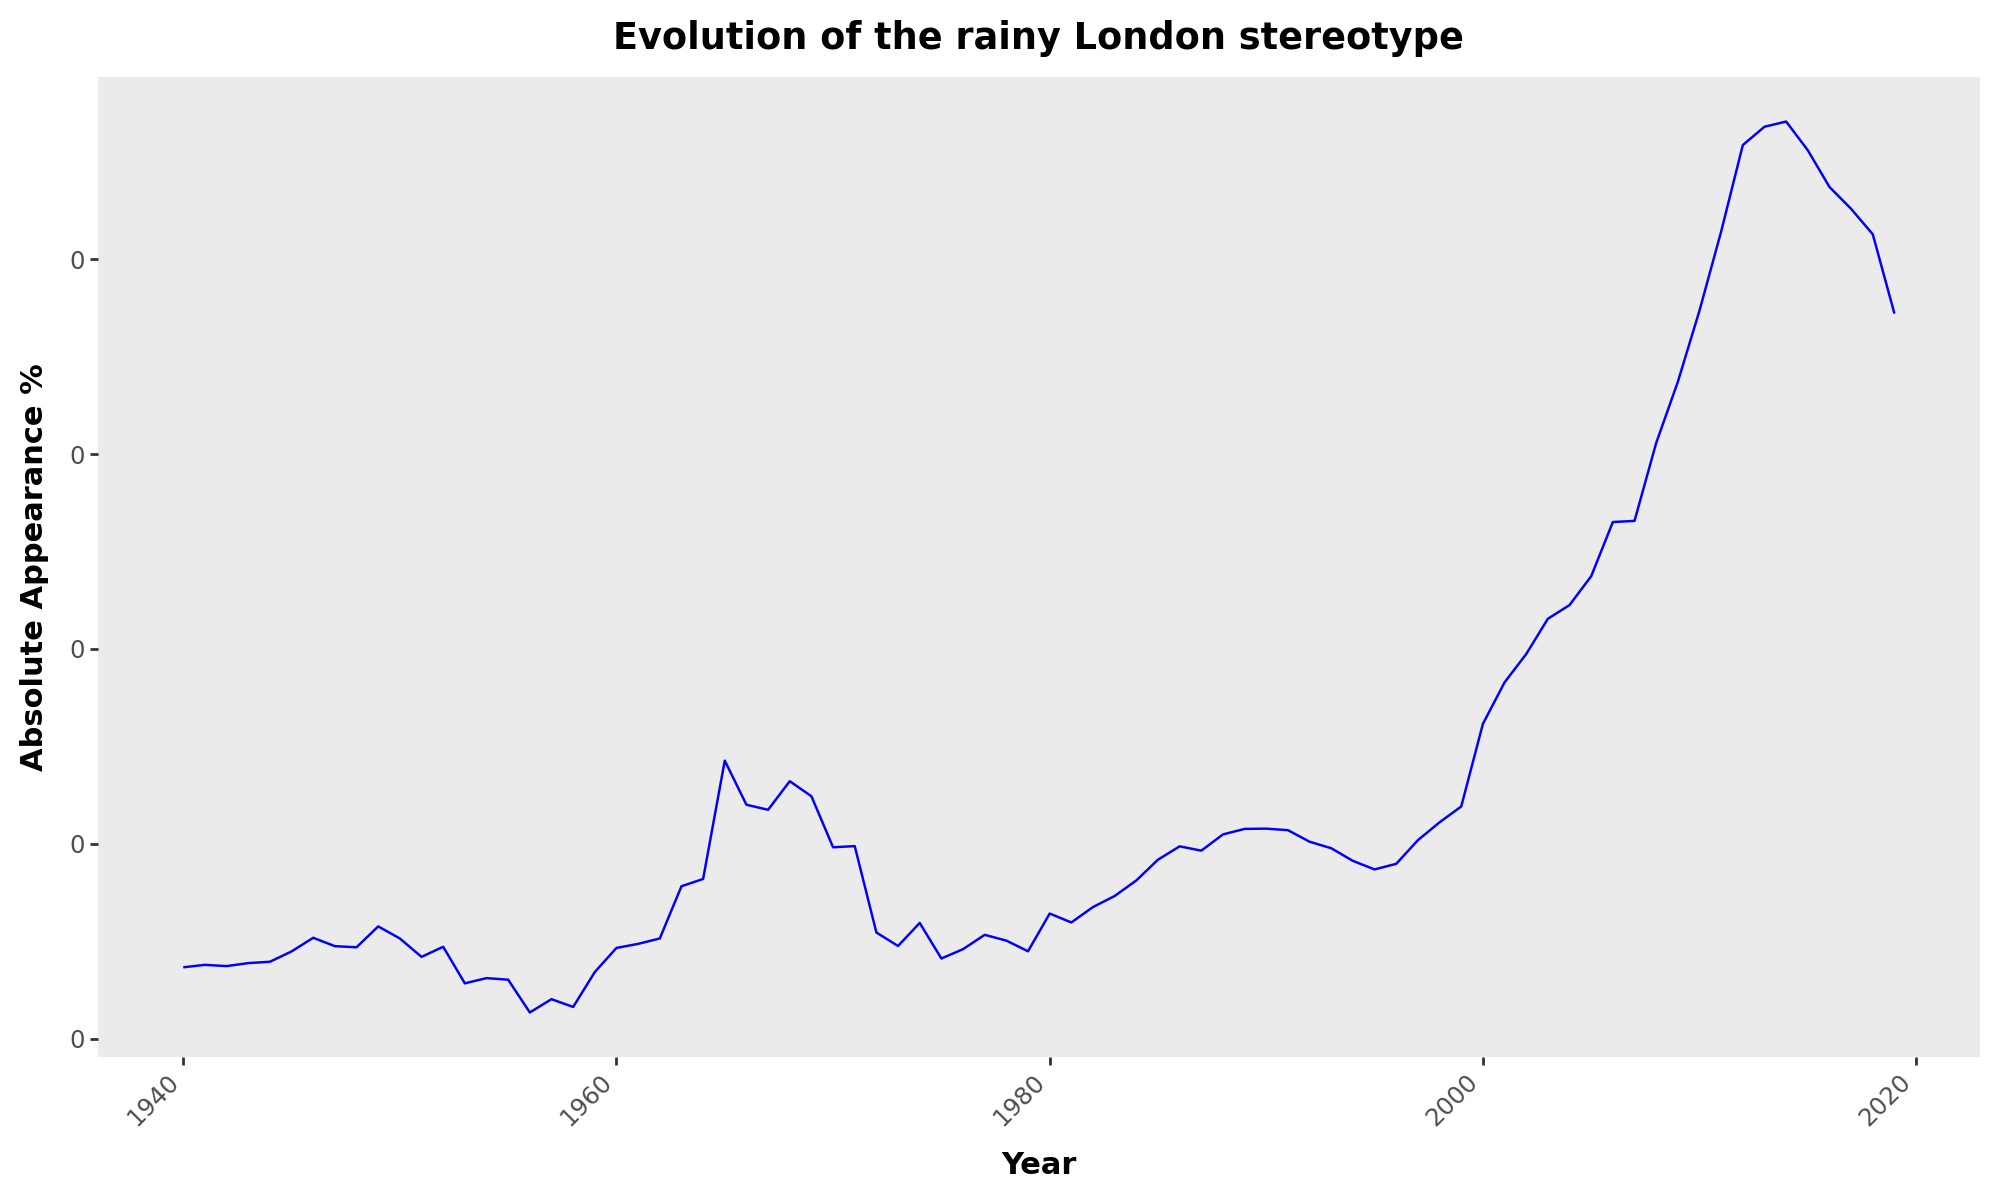

In [131]:
# Plot the aggregated data
NGRAMS_plot = (ggplot(NGRAMS_df) +
        aes(x='Year', y='Rain Absolute Appearance %') +
        geom_line(color='blue') +
        labs(title='Evolution of the rainy London stereotype', x='Year', y='Absolute Appearance %') +
        theme(axis_text_x=element_text(angle=45, hjust=1),
              axis_text_y=element_text(hjust=1),  # Add a comma here
              axis_title=element_text(weight='bold'),
              plot_title=element_text(weight='bold'),
              panel_grid=element_blank()) +
        theme(figure_size=(10, 6))  # Adjust the figure size
       )

# Displaying the plot
NGRAMS_plot.show()

show relevancy in another way ? another graph ? or abandon idea ?

Graph: Descriptive observation of the change in relative appearance % of the rainy stereotype

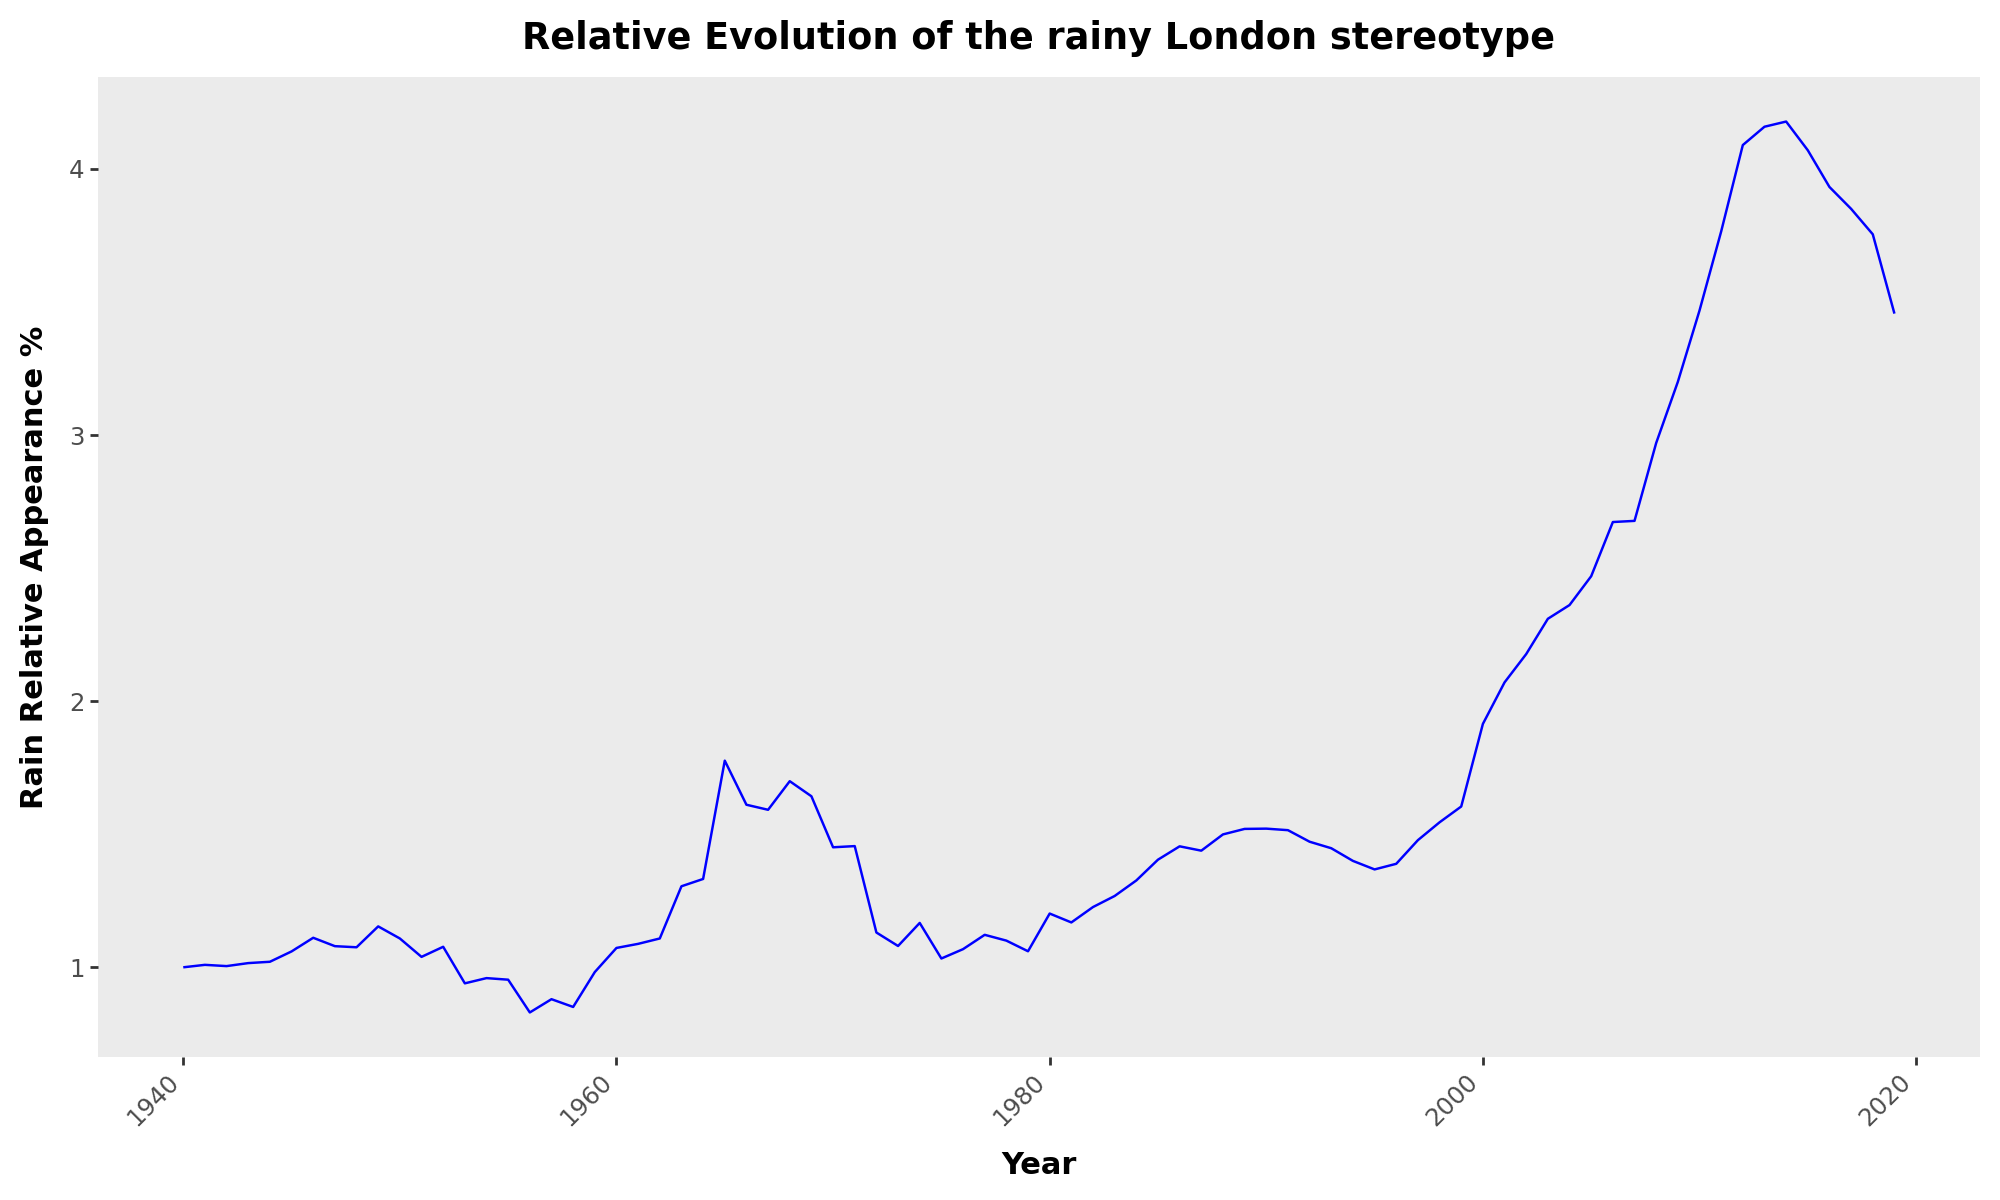

In [132]:
# Plot the aggregated data
NGRAMS_rel_plot = (ggplot(NGRAMS_df) +
        aes(x='Year', y='Rain Relative Appearance %') +
        geom_line(color='blue') +
        labs(title='Relative Evolution of the rainy London stereotype', x='Year', y='Rain Relative Appearance %') +
        theme(axis_text_x=element_text(angle=45, hjust=1),
              axis_title=element_text(weight='bold'),
              plot_title=element_text(weight='bold'),
              panel_grid=element_blank()) +
        theme(figure_size=(10, 6))  # Adjust the figure size
       )

# Displaying the plot
NGRAMS_rel_plot.show()

## More complex interactions:

In [133]:
weather_df = pd.read_csv('..\\data\\weather_data.csv')

In [134]:
#Drop years not available in the NGRAM data
weather_df = weather_df.drop(weather_df[weather_df['date'].str.startswith(('2020','2021','2022','2023'))].index)

# Convert 'date' column to datetime format
weather_df['date'] = pd.to_datetime(weather_df['date'])

# Extract year from the 'date' column
weather_df['Year'] = weather_df['date'].dt.year

# Group by 'city' and 'year' and calculate the average precipitation and temperature
weather_av_df = weather_df.groupby(['city', 'Year']).agg({'temperature_2m_max': 'mean', 'temperature_2m_min':'mean','temperature_2m_mean':'mean','daylight_duration':'mean','sunshine_duration':'mean','precipitation_sum':'mean','rain_sum':'mean','precipitation_hours':'mean'}).reset_index()


In [135]:
#restrict the data to London only as other cities are not available in the NGRAM data (explain with english language)
london_weather_df = weather_av_df[weather_av_df['city'] == 'London'].copy()
london_weather_df.reset_index(drop=True, inplace=True)

london_weather_df

,city,Year,temperature_2m_max,temperature_2m_min,temperature_2m_mean,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,precipitation_hours
0,London,1940,13.484183,6.550713,10.068837,44144.924281,26880.139786,1.298082,1.214521,3.729508
1,London,1941,13.085692,6.732541,9.977552,44187.043847,25455.916658,1.403562,1.329589,4.287671
2,London,1942,12.813226,6.286788,9.575777,44187.254567,25704.596571,1.385753,1.284384,4.013699
3,London,1943,14.088431,6.741034,10.470914,44187.987899,27996.281854,1.183562,1.169315,3.369863
4,London,1944,13.432817,6.426123,9.946023,44144.917426,27961.525157,1.248087,1.240710,3.584699
...,...,...,...,...,...,...,...,...,...,...
75,London,2015,14.396418,7.491075,11.050442,44187.900186,24927.255311,1.746849,1.732329,3.131507
76,London,2016,14.350757,7.470019,10.950626,44145.667290,25817.634923,1.591530,1.583880,3.092896
77,London,2017,14.819904,7.617027,11.266331,44187.979104,24455.044566,1.807671,1.743836,3.884932
78,London,2018,15.504013,7.572233,11.543728,44187.966096,25978.248658,1.685753,1.625479,3.810959


In [136]:
# Merge weather and NGRAMS data
london_inter_df = pd.merge(london_weather_df, NGRAMS_df, on='Year')

=> keeping other variables -- if want to do other interactions with other weather variables eg temp for climate change

In [137]:
london_inter_df

,city,Year,temperature_2m_max,temperature_2m_min,temperature_2m_mean,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,precipitation_hours,Rain Absolute Appearance %,Rain Relative Appearance %,Sun Absolute Appearance %,Sun Relative Appearance %,Wind Absolute Appearance %,Wind Relative Appearance %
0,London,1940,13.484183,6.550713,10.068837,44144.924281,26880.139786,1.298082,1.214521,3.729508,2.731485e-09,1.000000,2.793287e-09,1.000000,1.084660e-09,1.000000
1,London,1941,13.085692,6.732541,9.977552,44187.043847,25455.916658,1.403562,1.329589,4.287671,2.756745e-09,1.009248,3.167608e-09,1.134007,1.089897e-09,1.004827
2,London,1942,12.813226,6.286788,9.575777,44187.254567,25704.596571,1.385753,1.284384,4.013699,2.743879e-09,1.004537,3.083440e-09,1.103875,1.157072e-09,1.066760
3,London,1943,14.088431,6.741034,10.470914,44187.987899,27996.281854,1.183562,1.169315,3.369863,2.774656e-09,1.015805,3.075601e-09,1.101069,1.440626e-09,1.328182
4,London,1944,13.432817,6.426123,9.946023,44144.917426,27961.525157,1.248087,1.240710,3.584699,2.788329e-09,1.020811,2.835732e-09,1.015196,1.480596e-09,1.365032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,London,2015,14.396418,7.491075,11.050442,44187.900186,24927.255311,1.746849,1.732329,3.131507,1.111827e-08,4.070414,5.463863e-09,1.956069,1.383531e-09,1.275543
76,London,2016,14.350757,7.470019,10.950626,44145.667290,25817.634923,1.591530,1.583880,3.092896,1.074132e-08,3.932411,5.351956e-09,1.916006,1.426971e-09,1.315592
77,London,2017,14.819904,7.617027,11.266331,44187.979104,24455.044566,1.807671,1.743836,3.884932,1.051684e-08,3.850227,5.551843e-09,1.987566,1.437869e-09,1.325640
78,London,2018,15.504013,7.572233,11.543728,44187.966096,25978.248658,1.685753,1.625479,3.810959,1.025569e-08,3.754620,5.736526e-09,2.053683,1.327745e-09,1.224112


Graph: interaction between NGRAMS perception and precipitation hours

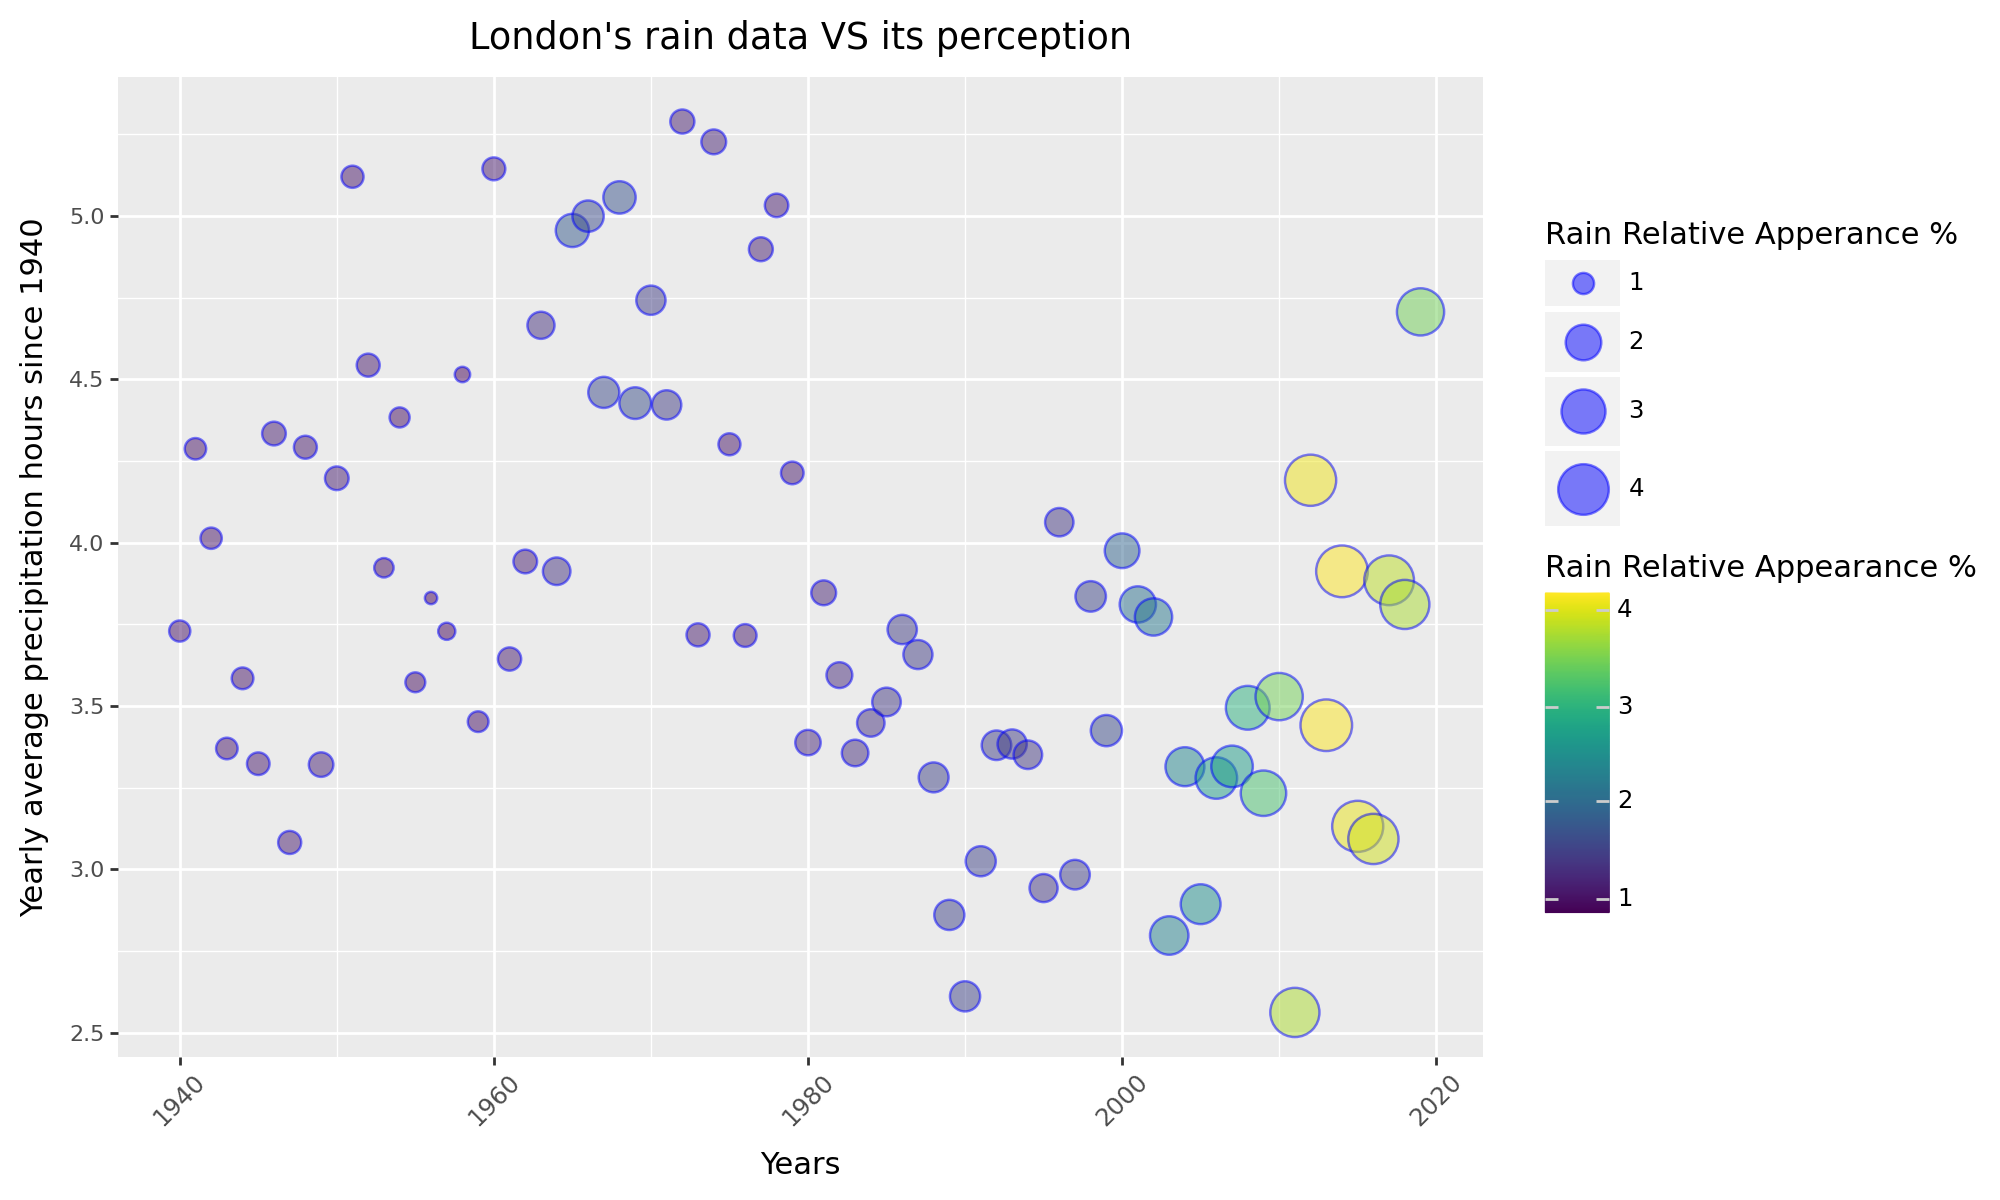

In [140]:
from plotnine import ggplot, aes, geom_point

# Define aesthetics
aesthetics = aes(x='Year', y='precipitation_hours', size='Rain Relative Appearance %', fill = 'Rain Relative Appearance %')

# Create the plot
bubble_plot = ggplot(london_inter_df, aesthetics) + \
    geom_point(alpha=0.5, color='blue') + \
    scale_size_continuous(range=(2, 10), name='Rain Relative Apperance %') + \
    scale_fill_continuous(name='Rain Relative Appearance %') + \
    labs(title="London's rain data VS its perception", x='Years', y='Yearly average precipitation hours since 1940') + \
    theme(axis_text_y=element_text(size=8)) + \
    theme(figure_size=(10, 6)) + \
    theme(axis_text_x=element_text(rotation=45))

# Display the plot
bubble_plot.show()

#note: the legend for dots and colors not useful as appearance percentages very small = get rid of numbers ?

Interpretation: In the early years post 1940, average precipiation hours were higher then in the post 2000s, yet the percentage appearance of London as being a rainy city in litterature was lowest around 1940 and highest around 2019. This shows how perception of London as a rainy city and the actual weather facts are negatively correlated, and that this stereotype is not justified by precipitation hours. 

Graph: interaction between NGRAMS perception and precipitation sum

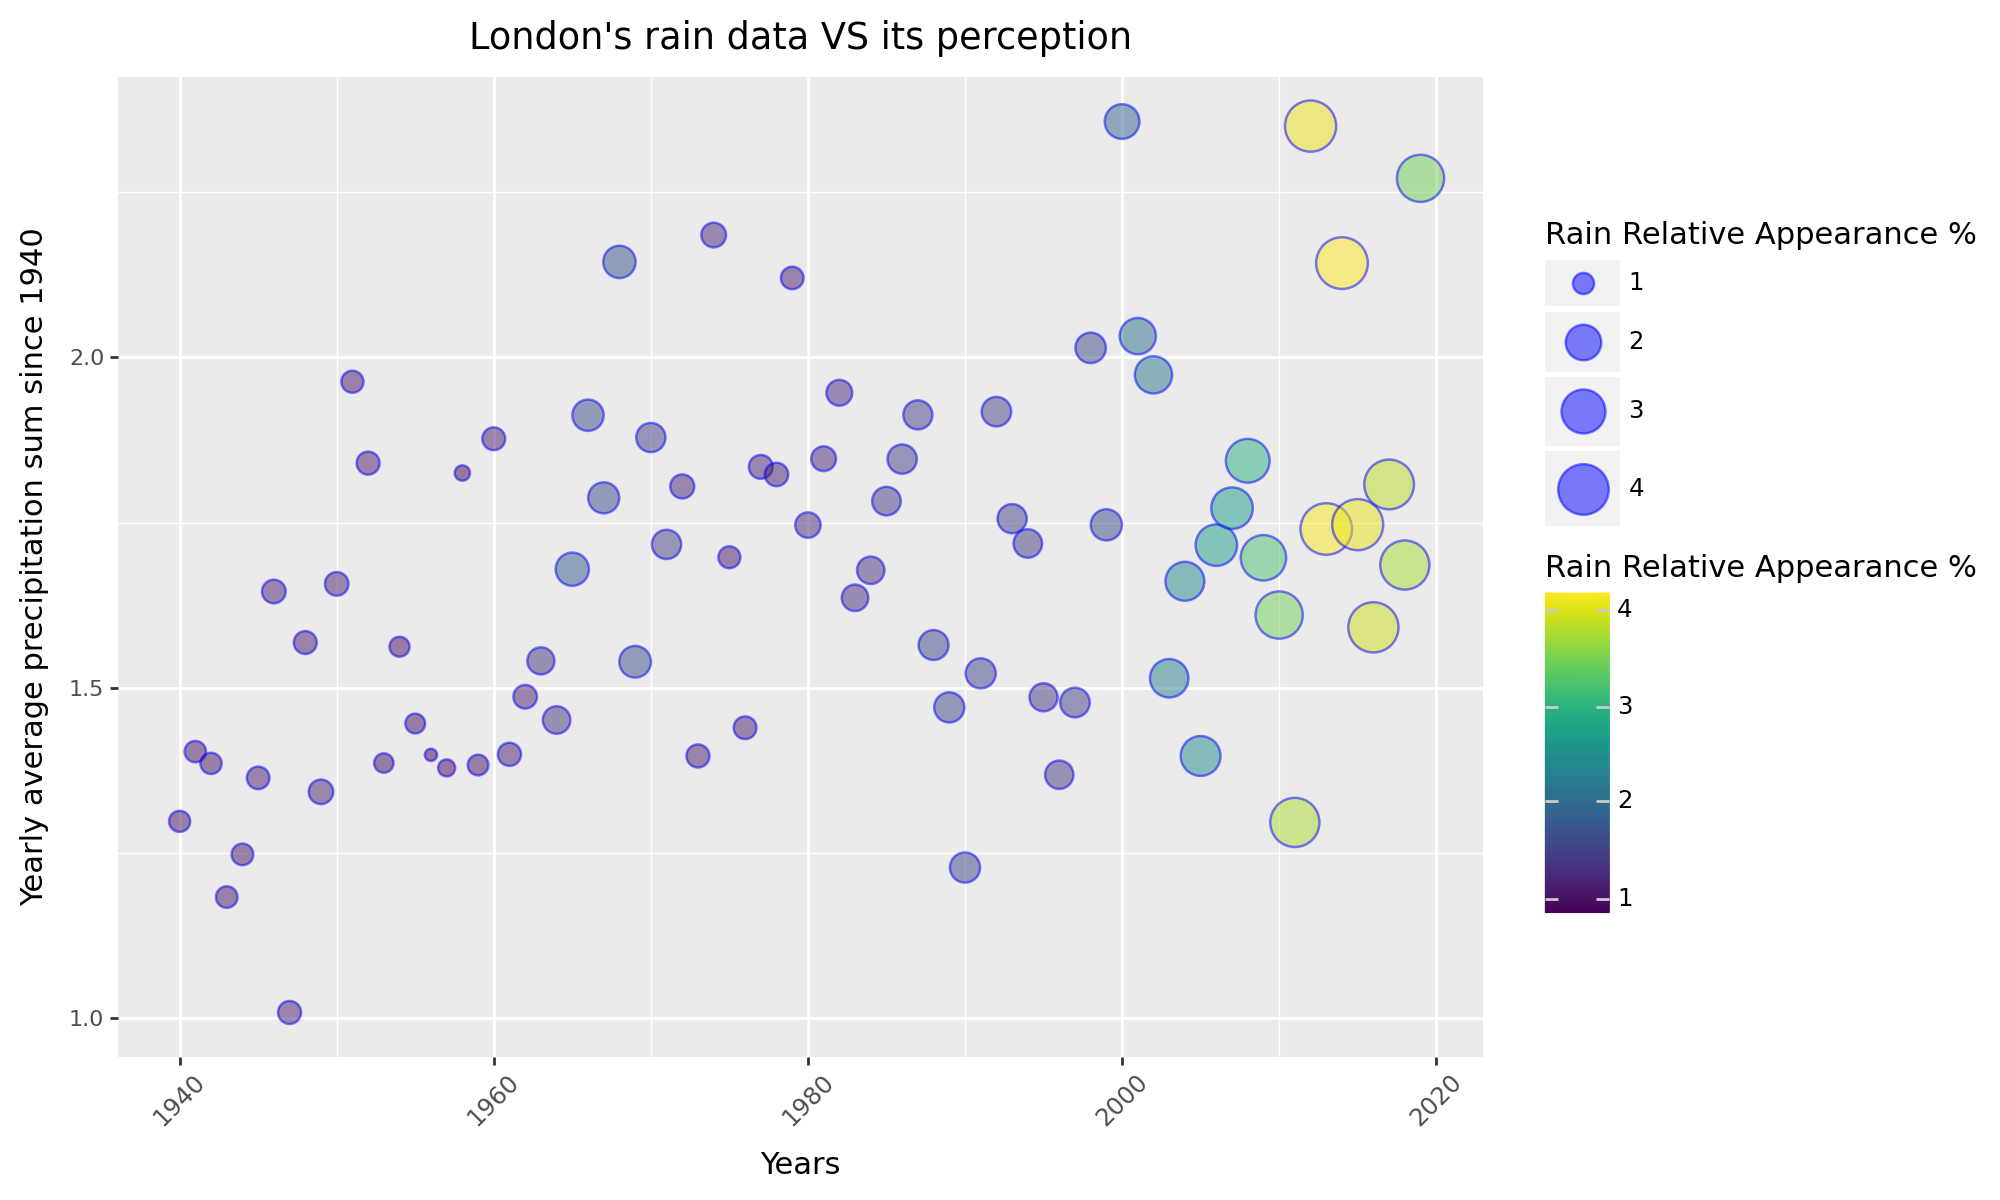

In [141]:
from plotnine import ggplot, aes, geom_point

# Define aesthetics
aesthetics = aes(x='Year', y='precipitation_sum', size='Rain Relative Appearance %', fill = 'Rain Relative Appearance %')

# Create the plot
bubble_plot2 = ggplot(london_inter_df, aesthetics) + \
    geom_point(alpha=0.5, color='blue') + \
    scale_size_continuous(range=(2, 10), name='Rain Relative Appearance %') + \
    scale_fill_continuous(name='Rain Relative Appearance %') + \
    labs(title="London's rain data VS its perception", x='Years', y='Yearly average precipitation sum since 1940') + \
    theme(axis_text_y=element_text(size=8)) + \
    theme(figure_size=(10, 6)) + \
    theme(axis_text_x=element_text(rotation=45))

# Display the plot
bubble_plot2.show()

#note: the legend for dots and colors not useful as appearance percentages very small = get rid of numbers ?

Interpretation: This graph does not show a clear correlation but we can still note that there are data points representing a low perception with a high precipitation sum; as well as a high perception with a low precipitation sum.

Graph: interaction between NGRAMS perception and sunshine duration

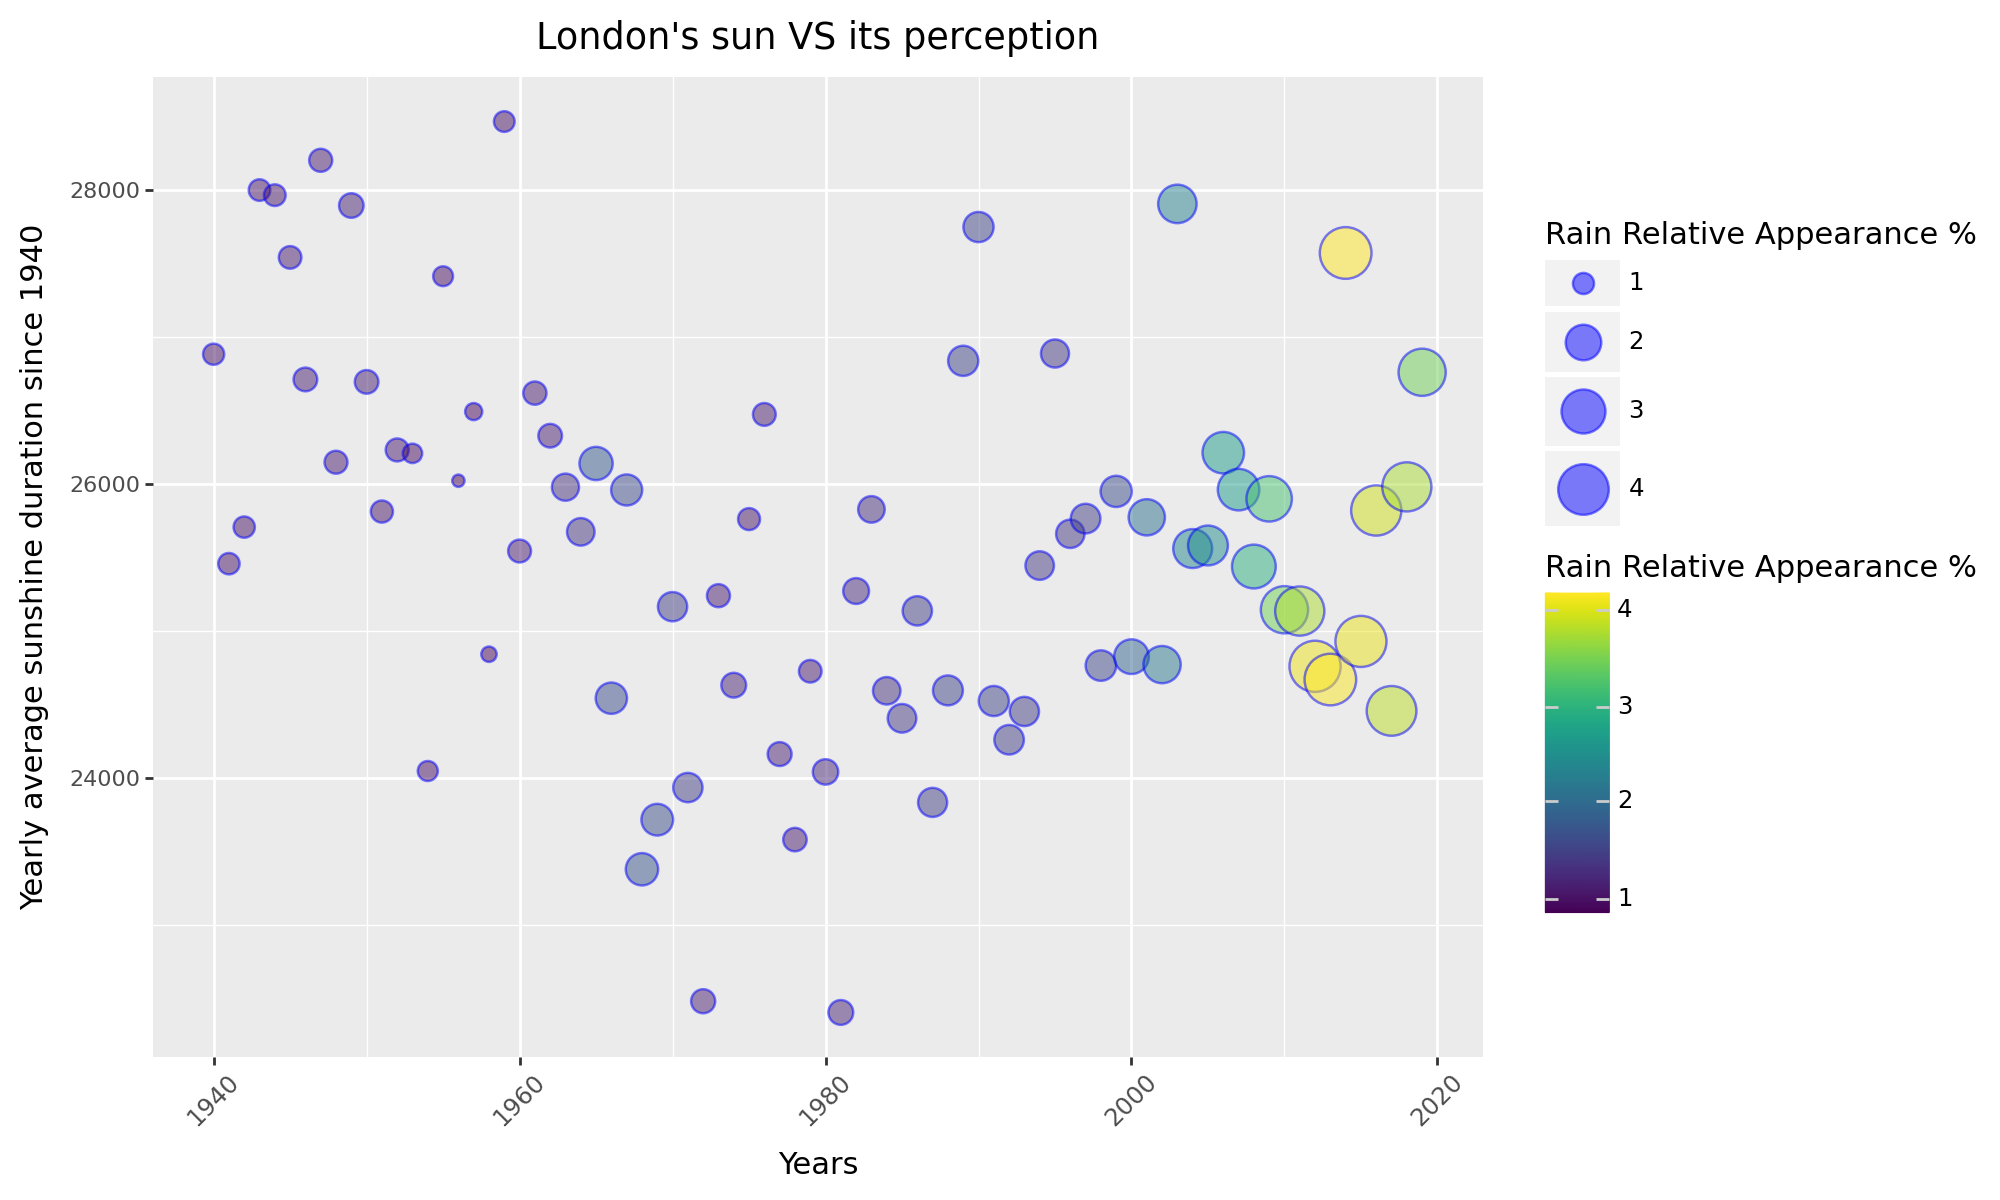

In [142]:
from plotnine import ggplot, aes, geom_point

# Define aesthetics
aesthetics = aes(x='Year', y='sunshine_duration', size='Rain Relative Appearance %', fill = 'Rain Relative Appearance %')

# Create the plot
bubble_plot3 = ggplot(london_inter_df, aesthetics) + \
    geom_point(alpha=0.5, color='blue') + \
    scale_size_continuous(range=(2, 10), name='Rain Relative Appearance %') + \
    scale_fill_continuous(name='Rain Relative Appearance %') + \
    labs(title="London's sun VS its perception", x='Years', y='Yearly average sunshine duration since 1940') + \
    theme(axis_text_y=element_text(size=8)) + \
    theme(figure_size=(10, 6)) + \
    theme(axis_text_x=element_text(rotation=45))

# Display the plot
bubble_plot3.show()

#note: the legend for dots and colors not useful as appearance percentages very small = get rid of numbers ?

Interpretation: There seems to be a negative correlation between sunshine duration and perception, implying there is a positive correlation between how cloudy London is and perception of London as a rainy city. This discovery could support our hypothesis that our stereotype is caused by how cloudy and gray London is rather than how much it actually rains.
Note: We can be sure that if there is a causality link it will be the weather data on the stereotypes, as the latter could not directly influence weather. 

Graph: interaction between NGRAMS perception and daylight duration

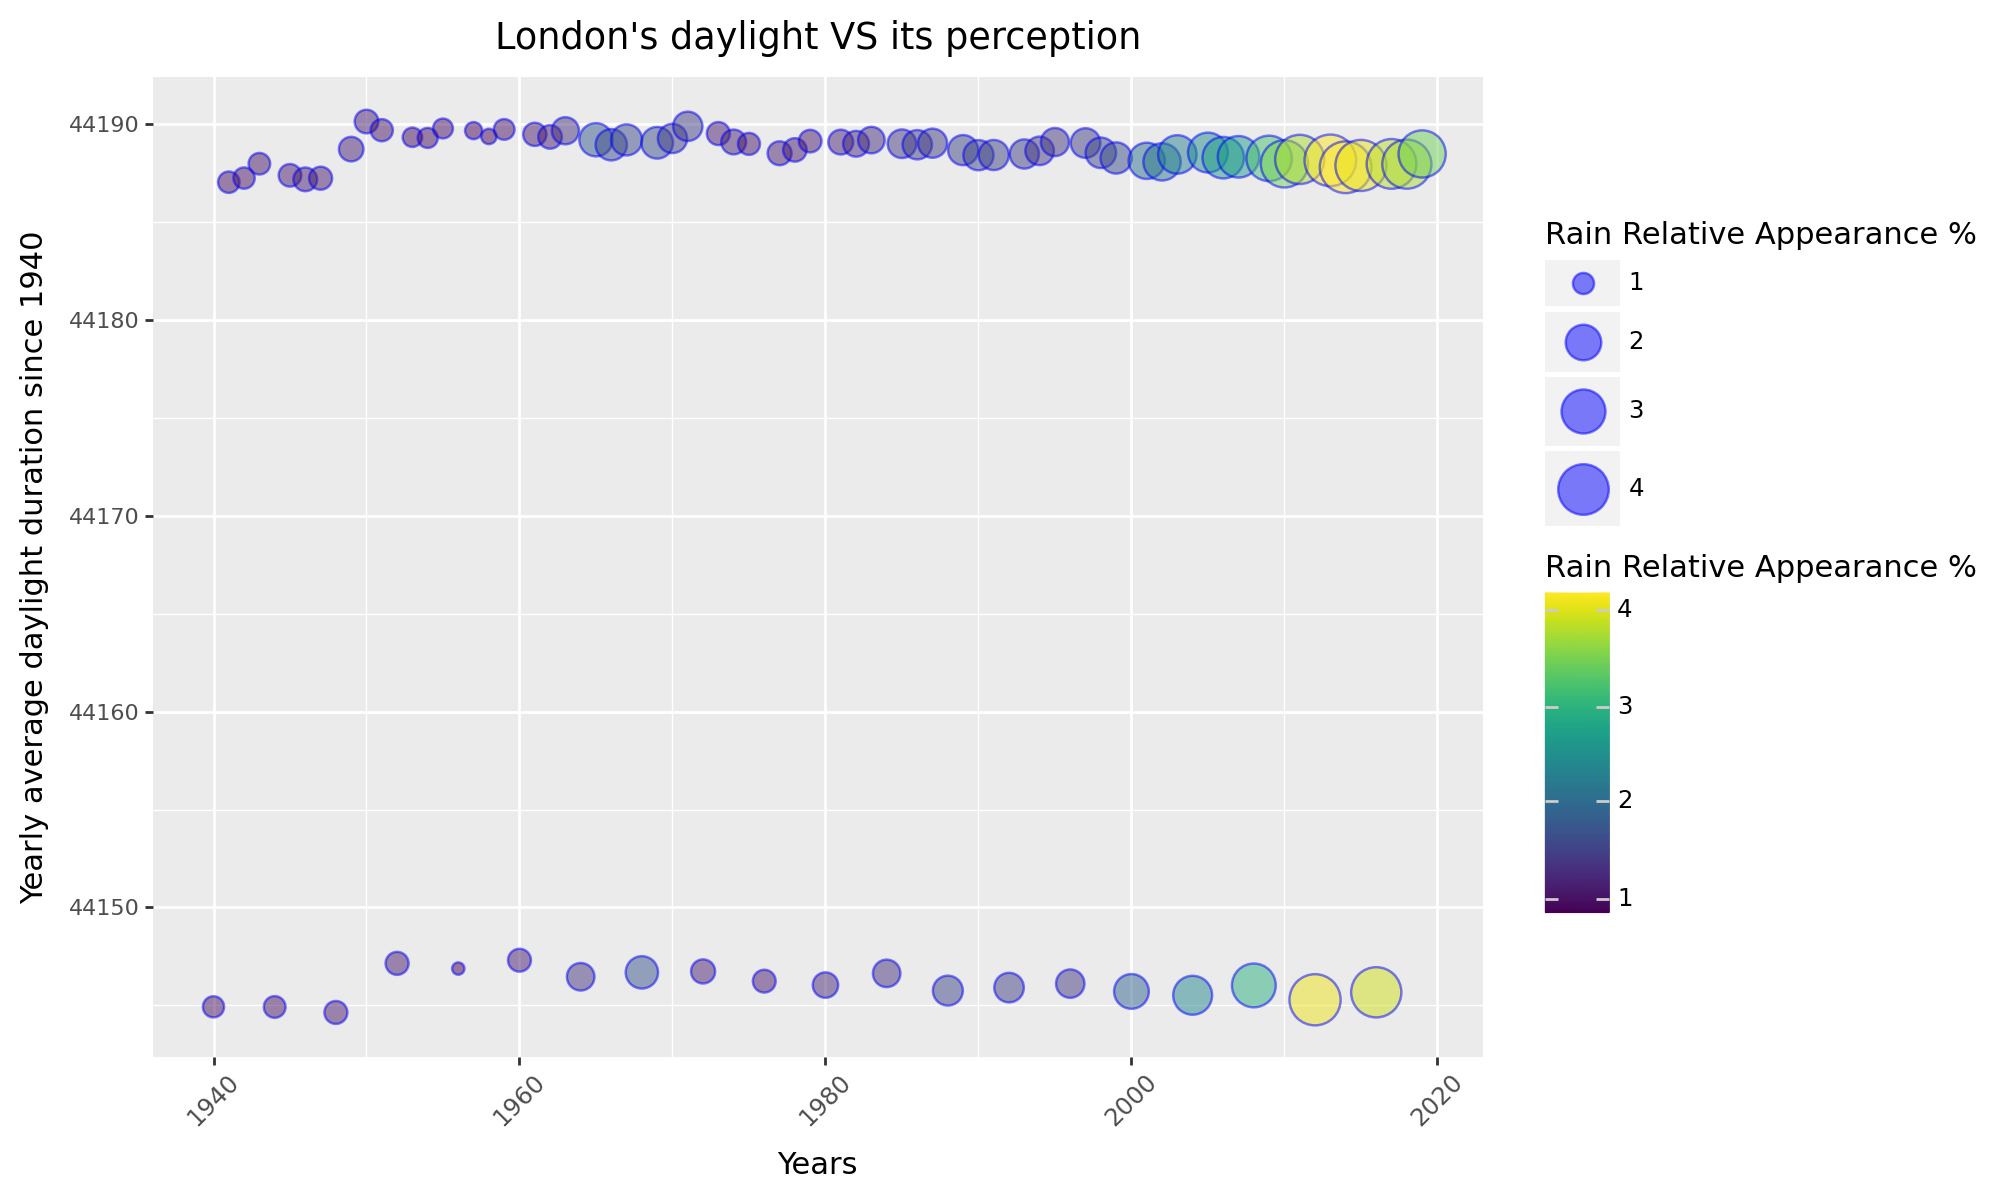

In [143]:
from plotnine import ggplot, aes, geom_point

# Define aesthetics
aesthetics = aes(x='Year', y='daylight_duration', size='Rain Relative Appearance %', fill = 'Rain Relative Appearance %')

# Create the plot
bubble_plot4 = ggplot(london_inter_df, aesthetics) + \
    geom_point(alpha=0.5, color='blue') + \
    scale_size_continuous(range=(2, 10), name='Rain Relative Appearance %') + \
    scale_fill_continuous(name='Rain Relative Appearance %') + \
    labs(title="London's daylight VS its perception", x='Years', y='Yearly average daylight duration since 1940') + \
    theme(axis_text_y=element_text(size=8)) + \
    theme(figure_size=(10, 6)) + \
    theme(axis_text_x=element_text(rotation=45))

# Display the plot
bubble_plot4.show()

#note: the legend for dots and colors not useful as appearance percentages very small = get rid of numbers ?

This graph seems useless ??

Graph: interaction between NGRAMS perception and temperature mean

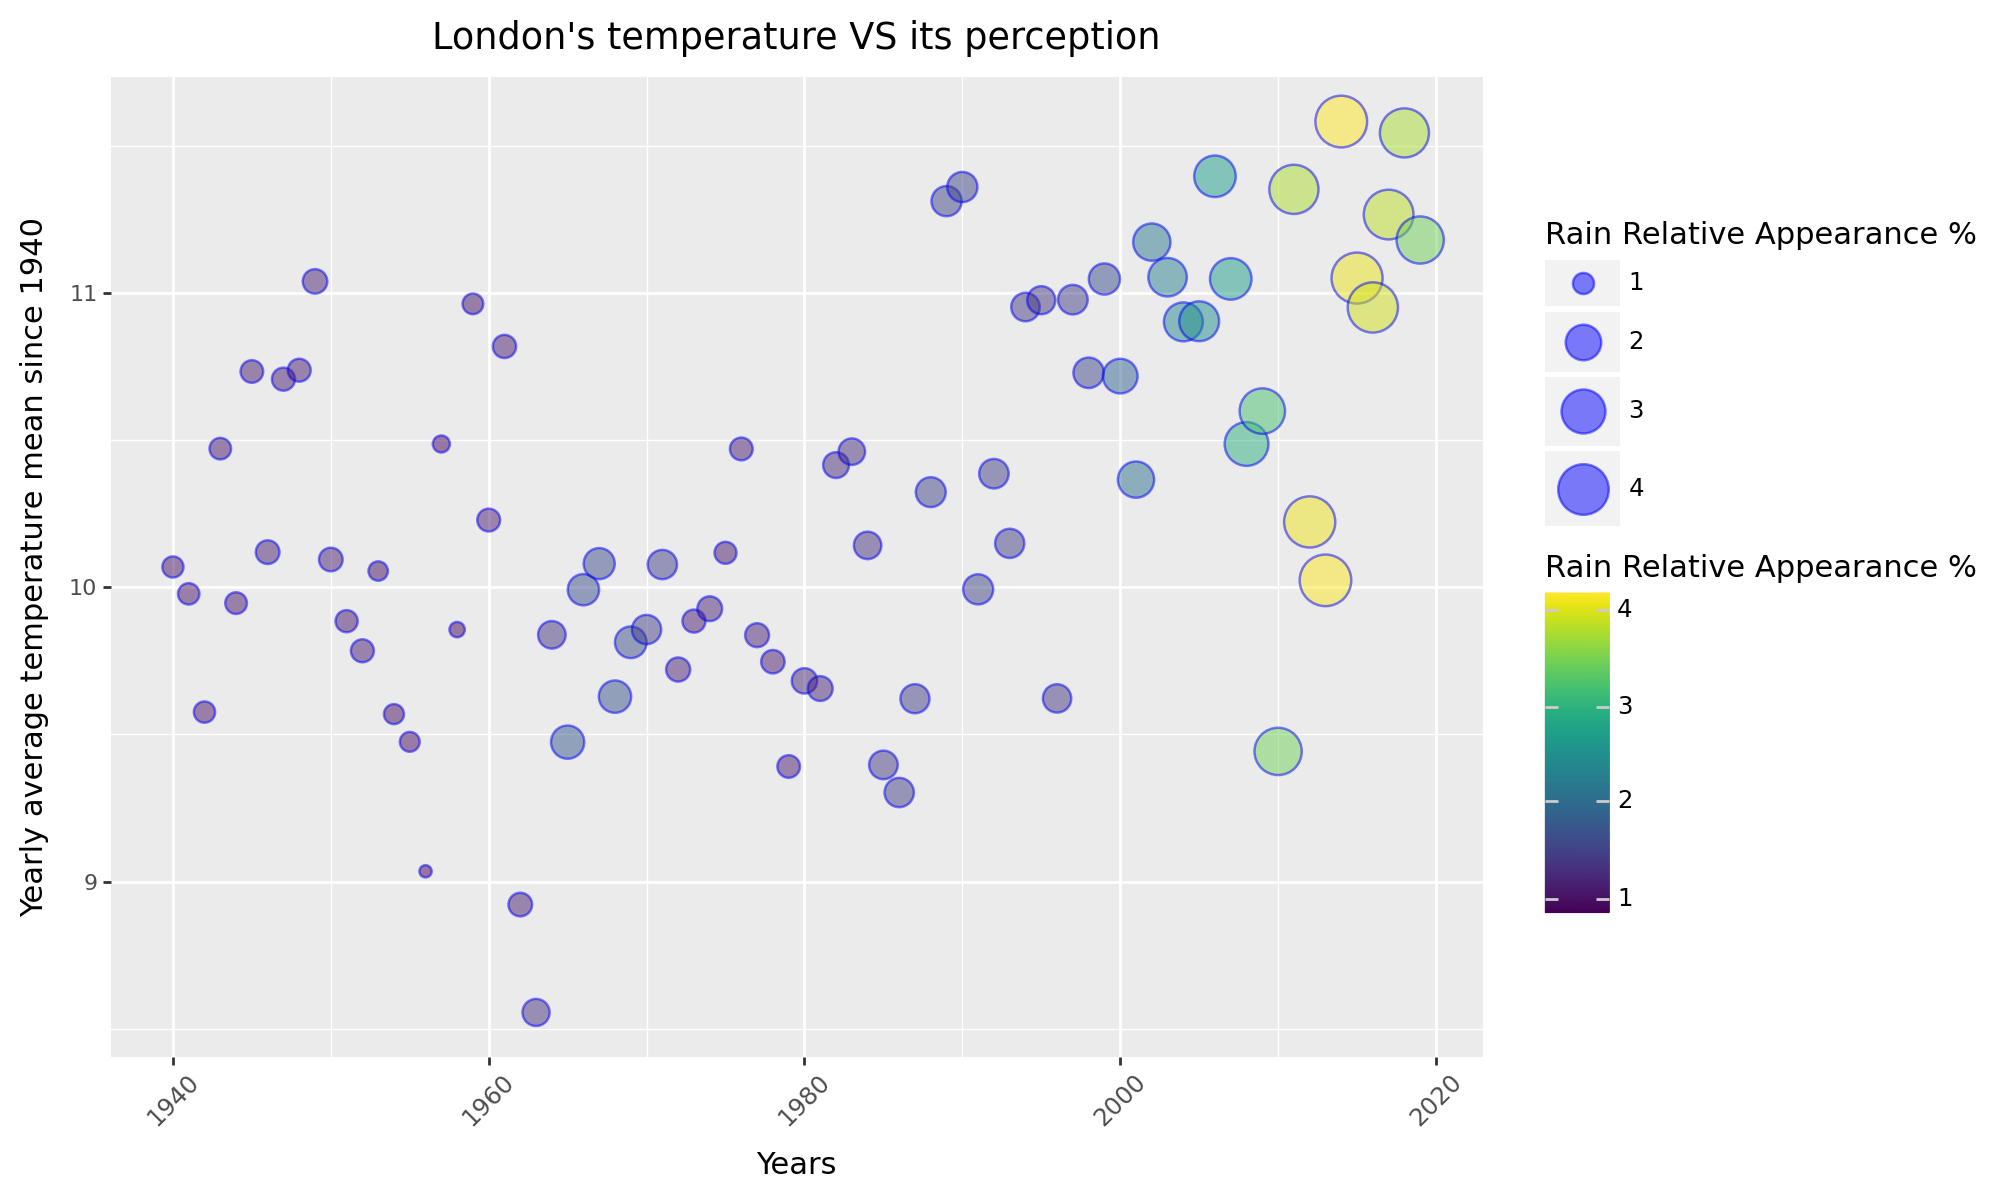

In [144]:
from plotnine import ggplot, aes, geom_point

# Define aesthetics
aesthetics = aes(x='Year', y='temperature_2m_mean', size='Rain Relative Appearance %', fill = 'Rain Relative Appearance %')

# Create the plot
bubble_plot4 = ggplot(london_inter_df, aesthetics) + \
    geom_point(alpha=0.5, color='blue') + \
    scale_size_continuous(range=(2, 10), name='Rain Relative Appearance %') + \
    scale_fill_continuous(name='Rain Relative Appearance %') + \
    labs(title="London's temperature VS its perception", x='Years', y='Yearly average temperature mean since 1940') + \
    theme(axis_text_y=element_text(size=8)) + \
    theme(figure_size=(10, 6)) + \
    theme(axis_text_x=element_text(rotation=45))

# Display the plot
bubble_plot4.show()

#note: the legend for dots and colors not useful as appearance percentages very small = get rid of numbers ?

Interpretation: We can guess a positive correlation between temperature mean and stereotype appearance. There could be several hypothesis to explain this, for instance as London gets hotter, people, by opposition, notice bad, rainy weather more. Yet again this would go along our hypothesis that London is not considered a rainy city for the right reason (ie precipitation factors) but because of other effects, such as temperature in this case.